# Data
The data is a list of passenger data from year 1949 to 1960.

This dataset is often use for Time Series Analysis and [here](https://www.kaggle.com/datasets/ashfakyeafi/air-passenger-data-for-time-series-analysis/data) you can download.

# Preparing data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Define read path

In [2]:
read_dir = r'C:\Users\ed_22\Documents\Selected-Statistics-Topics\Partial-II\Practice'
file_name = 'AirPassengers.csv'
read_path = os.path.join(read_dir, file_name)

## Read file

In [4]:
data = pd.read_csv(read_path)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Rename fields

In [6]:
data.columns = ['month', 'n_passengers']
data.head()

,month,n_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Set index

In [8]:
data.set_index('month').head()

,n_passengers
month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [9]:
data.head()

,month,n_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
data = data.set_index('month')
data.head()

,n_passengers
month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


Advantages

In [11]:
data.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='month', length=144)

In [12]:
data.loc['1949-05']

n_passengers    121
Name: 1949-05, dtype: int64

In [13]:
data.index = pd.to_datetime(data.index)
data.head()

,n_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Plotting

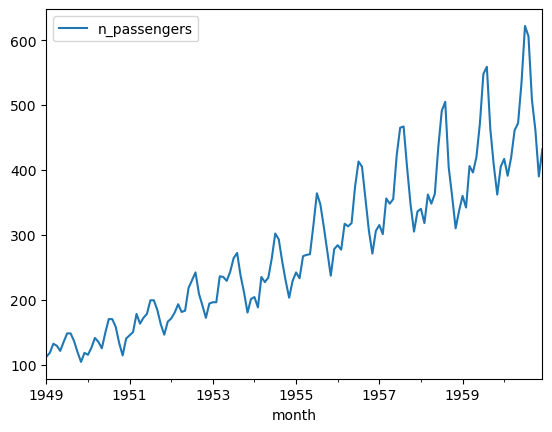

In [14]:
data.plot()
plt.show()

# Decomposition

## Additive 

In [15]:
additive_decomposition = seasonal_decompose(data, model='additive')

In [16]:
additive_decomposition

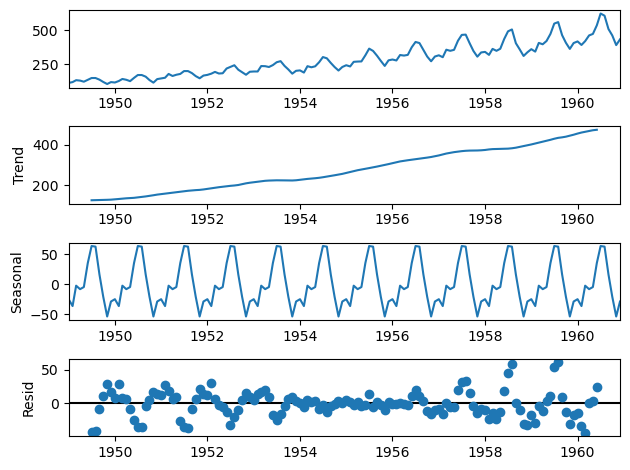

In [17]:
additive_decomposition.plot()
plt.show()

## Multiplicative

In [18]:
multiplicative_decomposition = seasonal_decompose(data, model='multiplicative')

In [19]:
multiplicative_decomposition

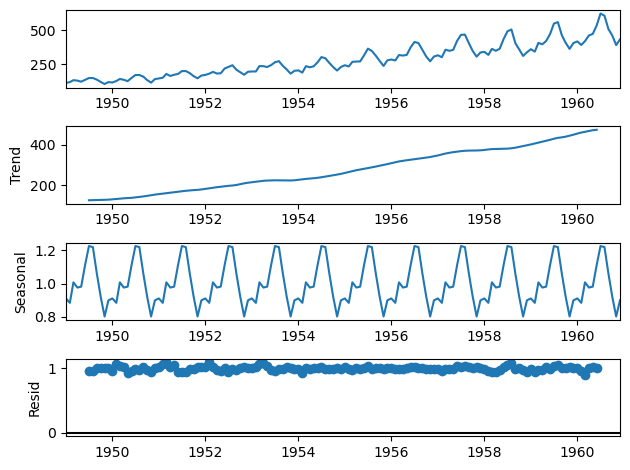

In [20]:
multiplicative_decomposition.plot()
plt.show()

# Decomposition process
See the source [here](https://towardsdatascience.com/time-series-decomposition-8f39432f78f9)

- Compute the *trend* component, $T$, using a **moving**/**rolling average**.
- *De-trend* the series

$$Y-T$$ for additive model and 

$$\dfrac{Y}{T}$$ for multiplicative model.

- Compute the *seasonal* component, $S$, by taking the average of the de-trended series for each season.
- The *residual* component, $R$, is calculated as: 

$$R = Y-T-S$$ for additive model and

$$R = \dfrac{Y}{T\cdot S}$$ for multiplicative model.

# When to use additive or multiplicative?
The additive model is most appropriate when the size of the series' variations are on a consistent absolute *numerical scale*. On the other hand, the multiplicative model is when the series' fluctuations are on a relative and *proportional scale*.